# Generowanie losowych punktów

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import eig
from numpy.linalg import matrix_power
from scipy.stats import norm

In [2]:
random_x = np.random.uniform(low=0, high=1, size=(500,))
random_y = np.random.uniform(low=0, high=1, size=(500,))
random_x = norm.ppf(random_x)
random_y = norm.ppf(random_y)
random_x, random_y

(array([-0.00884298, -0.36786803, -1.01177781,  0.38820057,  0.62558573,
        -0.40147591,  1.10086732,  0.68478144, -1.68280141,  1.07772768,
        -1.84193343, -2.57376441,  1.8015399 , -1.69291105, -0.63173972,
        -1.96927755,  0.66225372,  0.91917249,  1.09967912,  2.85844241,
        -0.87497772,  2.25093881,  0.18978967, -2.30020088, -0.31738396,
         2.48844689, -1.40907193, -0.00589354,  0.55300044,  0.61299807,
        -1.30629833,  0.43842573, -0.76762518, -1.56505785, -0.16323013,
         1.58374085,  0.334709  , -0.45790499, -1.12044923, -0.18973562,
        -1.0291238 , -0.126387  ,  1.69812545, -0.44037754,  0.71675591,
         0.04988779,  0.40843919, -1.55538554, -1.50933634,  0.24210098,
         0.7668501 ,  0.16875365, -1.57262756,  0.81022868, -0.36464504,
         0.49209665, -2.27073234, -0.07805256, -1.37693764,  0.46064559,
        -0.09791854, -1.53371316,  0.81076929,  1.52820139, -1.01267721,
        -0.9724538 ,  1.48220441, -0.35358616, -1.1

# Wizualizacja losowych punktów

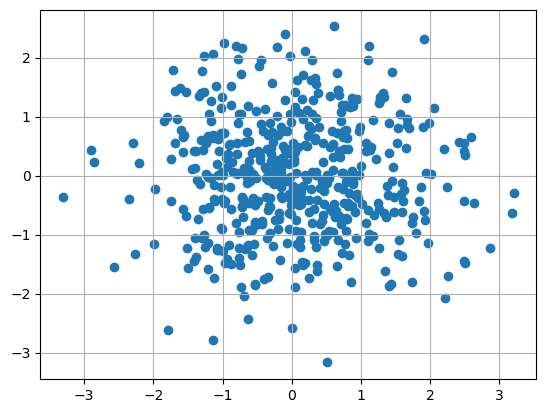

In [3]:
plt.scatter(random_x, random_y)
plt.grid()
plt.show()

# Wybranie macierzy kowariancji

In [4]:
y = np.array([random_x, random_y])

my_matrix = np.array([[100, 7], [7, 1]]) # to jest macierz kowariancji, którą można zmieniać dowolnie

lambdas,K = eig(my_matrix)
A = np.diag(lambdas)
A, K

(array([[100.49249944,   0.        ],
        [  0.        ,   0.50750056]]),
 array([[ 0.99753409, -0.07018357],
        [ 0.07018357,  0.99753409]]))

# Transformacja odwrotna do wybielania

In [5]:
def inverse_whitening(K, A, y):
    sqrtA = A
    sqrtA[0][0] = math.sqrt(A[0][0])
    sqrtA[1][1] = math.sqrt(A[1][1])
    x = np.dot(np.dot(K, sqrtA), y)
    return x

In [6]:
x = inverse_whitening(K, A, y)
x

array([[-1.33751115e-01, -3.66063029e+00, -1.01845106e+01,
         3.84055084e+00,  6.29081945e+00, -3.92713064e+00,
         1.09105812e+01,  6.88156058e+00, -1.68550906e+01,
         1.07561060e+01, -1.84651936e+01, -2.56600928e+01,
         1.80634268e+01, -1.70002789e+01, -6.25860564e+00,
        -1.96811330e+01,  6.67726024e+00,  9.20820898e+00,
         1.10523692e+01,  2.86457620e+01, -8.72173539e+00,
         2.25944912e+01,  1.97192251e+00, -2.30289799e+01,
        -3.15487723e+00,  2.48631390e+01, -1.41110892e+01,
        -2.65701380e-02,  5.55784829e+00,  6.15394876e+00,
        -1.31330301e+01,  4.38768683e+00, -7.61470154e+00,
        -1.56705291e+01, -1.56044569e+00,  1.58530121e+01,
         3.31508836e+00, -4.59574751e+00, -1.11172906e+01,
        -1.86531919e+00, -1.03276148e+01, -1.28886894e+00,
         1.69405535e+01, -4.44714372e+00,  7.12133008e+00,
         5.77311768e-01,  4.09488214e+00, -1.55881690e+01,
        -1.50317279e+01,  2.44162477e+00,  7.60865553e+0

# Wizualizacja transformowanych punktow

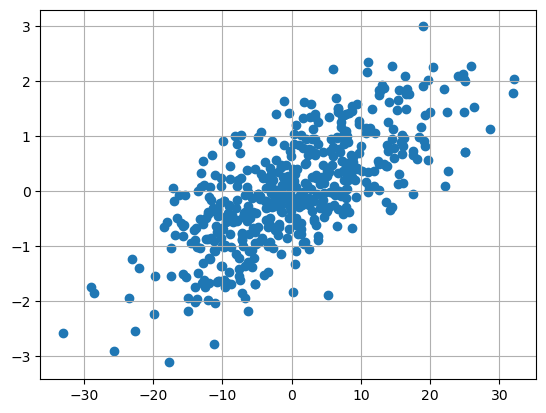

In [7]:
plt.scatter(x[0, :], x[1, :])
plt.grid()
plt.show()